In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_excel("./dataset/Linear Regression.xlsx")
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
# reviewing the columns labels of the dataset.
dataset.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [6]:
dataset.shape # reviewing the shape of dataset before removing null valued column.

(21613, 5)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb135cf5490>,
      dtype=object)

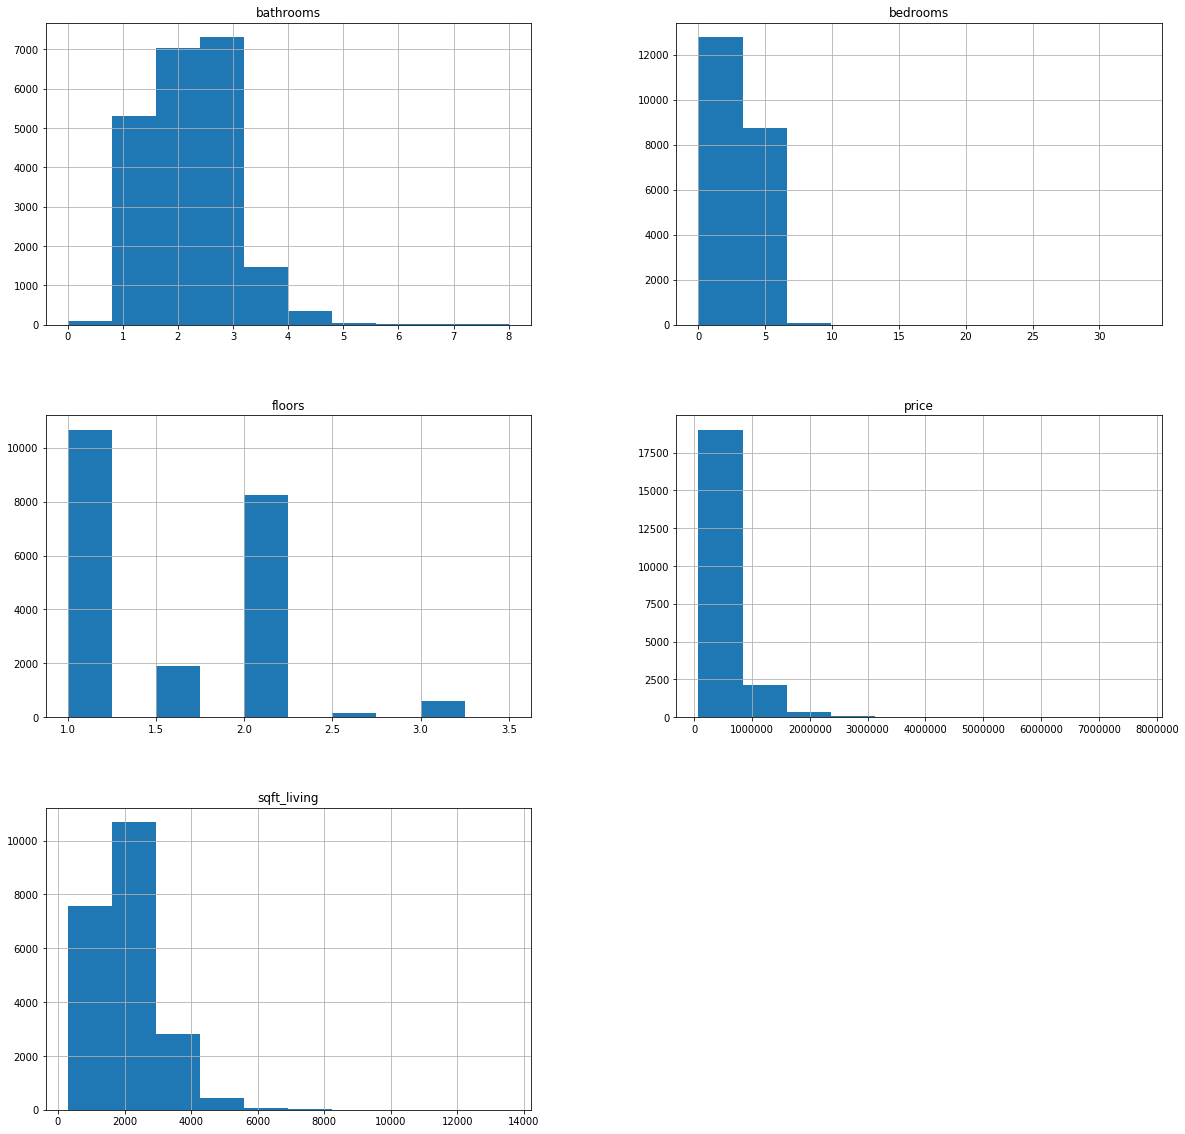

In [8]:
dataset.hist(figsize=(20,20))     # plotting of Histogram

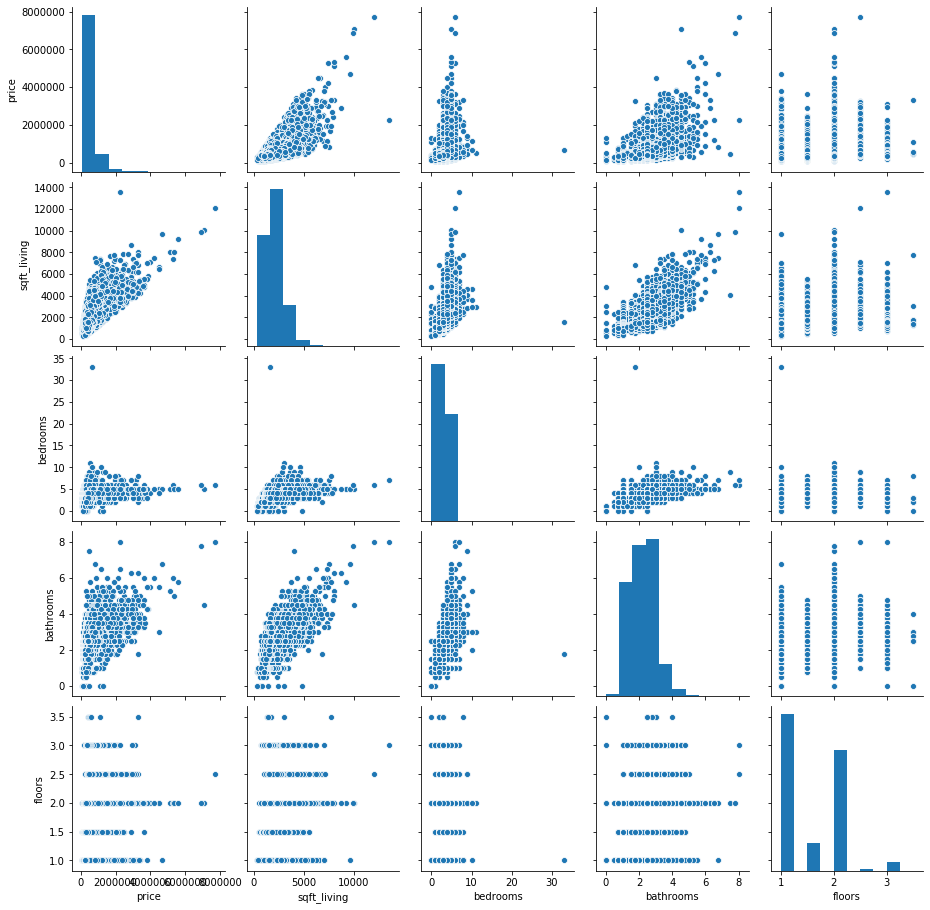

In [9]:
sns.pairplot(dataset)

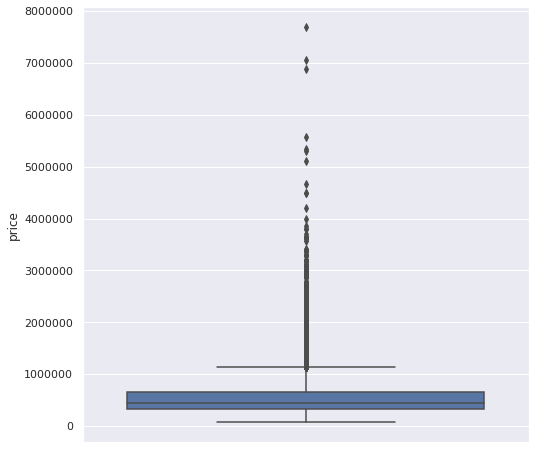

In [21]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["price"],orient='v')

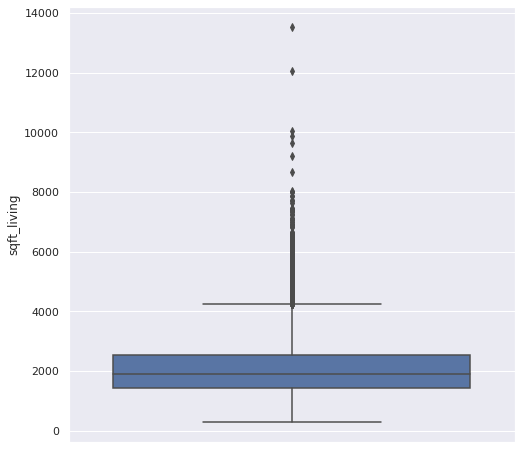

In [22]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["sqft_living"],orient='v')

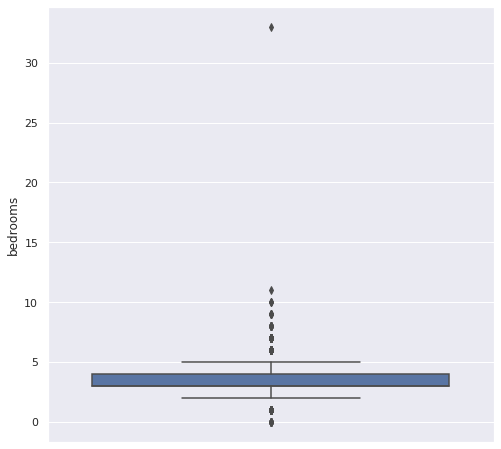

In [23]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["bedrooms"],orient='v')

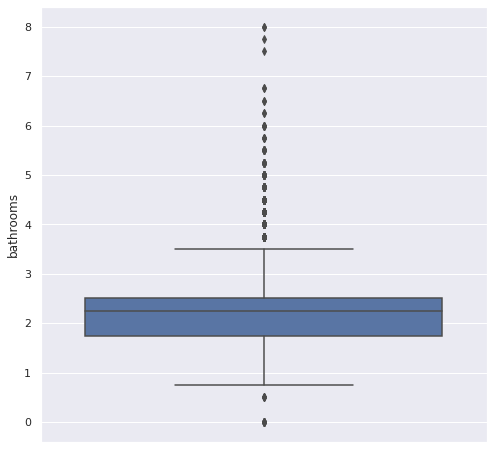

In [24]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["bathrooms"],orient='v')

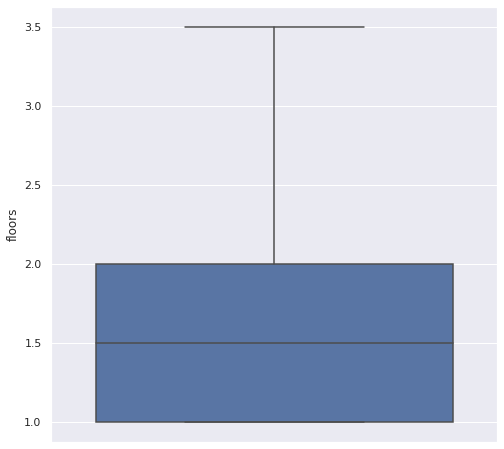

In [25]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(dataset["floors"],orient='v')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## MODEL-1 ---> LINEAR REGRESSION MODEL BETWEEN PRICE AND SQFT_LIVING:


In [30]:
price = dataset.iloc[:, :1]
sqft_living = dataset.iloc[:,1:2]

Text(0, 0.5, 'Area of house in squarefeet')

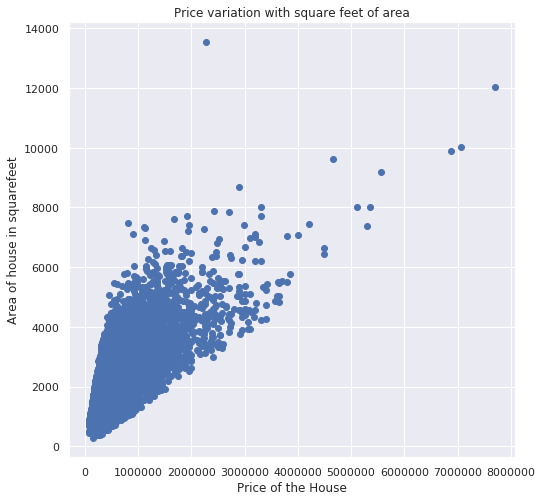

In [31]:
plt.scatter(price, sqft_living)
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area of house in squarefeet')

In [33]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(price, sqft_living, test_size = 0.3, random_state = 0)

In [36]:
print(X_train1)
print(X_test1)
print(Y_train1)
print(Y_test1)

         price
1468    400000
15590   430000
18552   720000
10535   392500
1069    505000
...        ...
13123  1180000
19648   299000
9845    431000
10799   411000
2732    699900

[15129 rows x 1 columns]
         price
17384   297000
722    1578000
2680    562100
18754   631500
14554   780000
...        ...
18588  1100000
6784    700000
14510   380000
18917   268000
11750   206000

[6484 rows x 1 columns]
       sqft_living
1468          1390
15590         1450
18552         2860
10535         1050
1069          1240
...            ...
13123         3960
19648         1400
9845          2360
10799         2370
2732          2380

[15129 rows x 1 columns]
       sqft_living
17384         1430
722           4670
2680          1440
18754         1130
14554         3180
...            ...
18588         1560
6784          2360
14510         2150
18917         1480
11750         1320

[6484 rows x 1 columns]


In [42]:
model1 = LinearRegression()
model1.fit(X_train1, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model1.coef_

array([[0.0017768]])

In [44]:
model1.intercept_

array([1117.93089511])

Text(0, 0.5, 'Area of house in squarefeet')

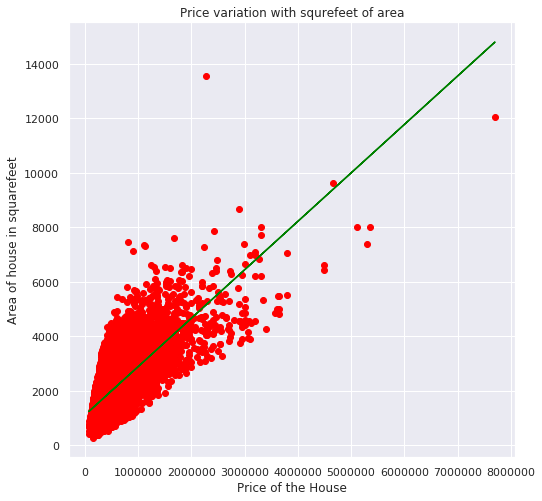

In [47]:
plt.scatter(X_train1, Y_train1, color = 'red')
plt.plot(X_train1, model1.predict(X_train1), color = 'green')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area of house in squarefeet')

In [54]:
Y_pred1 = model1.predict(X_test1)

Text(0, 0.5, 'Area in squarefeet')

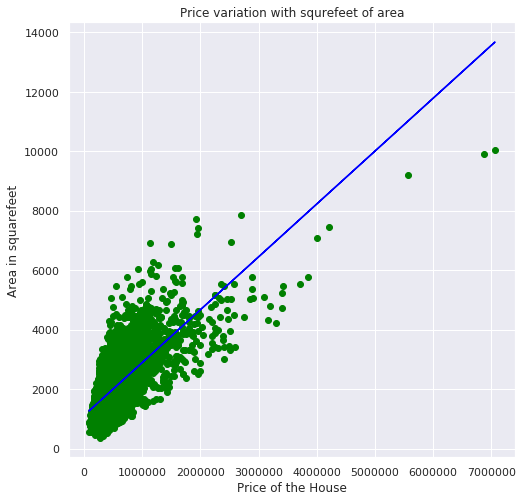

In [55]:
plt.scatter(X_test1,Y_test1, color = 'green')
plt.plot(X_test1, model1.predict(X_test1), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [58]:
RMSE1 = np.sqrt(mean_squared_error(Y_test1, Y_pred1))
r_square1 = r2_score(Y_test1, Y_pred1)

print(f'The R-Square value is....{r_square1}')
print(f'The RMSE value is........{RMSE1}')

The R-Square value is....0.48851042297818303
The RMSE value is........647.6834537592698


In [59]:
unseen_pred1 = model1.predict(np.array([[7368]]))
print(f'The unseen for the given x is....{unseen_pred1}')

The unseen for the given x is....[[1131.02233887]]


## MODEL-2 ---> LINEAR REGRESSION MODEL BETWEEN PRICE AND BEDROOM:

In [60]:
price = dataset.iloc[:, :1]
bedroom = dataset.iloc[:,2:3]

Text(0, 0.5, 'Bedrooms in House')

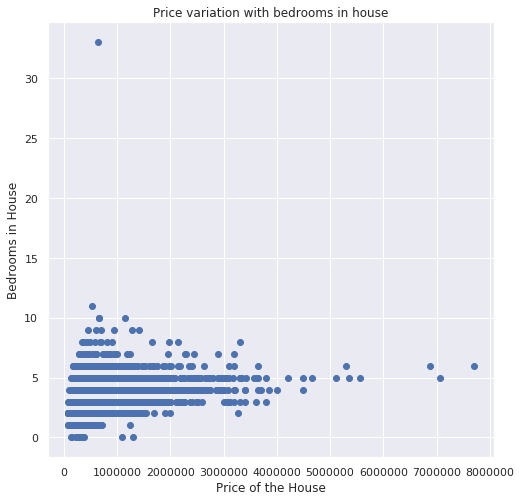

In [62]:
plt.scatter(price, bedroom)
plt.title('Price variation with bedrooms in house')
plt.xlabel('Price of the House')
plt.ylabel('Bedrooms in House')

In [65]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(price, bedroom, test_size = 0.3, random_state = 0)

In [66]:
print(X_train2)
print(X_test2)
print(Y_train2)
print(Y_test2)

         price
1468    400000
15590   430000
18552   720000
10535   392500
1069    505000
...        ...
13123  1180000
19648   299000
9845    431000
10799   411000
2732    699900

[15129 rows x 1 columns]
         price
17384   297000
722    1578000
2680    562100
18754   631500
14554   780000
...        ...
18588  1100000
6784    700000
14510   380000
18917   268000
11750   206000

[6484 rows x 1 columns]
       bedrooms
1468          4
15590         3
18552         5
10535         2
1069          2
...         ...
13123         5
19648         2
9845          3
10799         4
2732          4

[15129 rows x 1 columns]
       bedrooms
17384         2
722           4
2680          2
18754         2
14554         4
...         ...
18588         3
6784          4
14510         3
18917         3
11750         3

[6484 rows x 1 columns]


In [68]:
model2 = LinearRegression()
model2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model2.coef_

array([[8.10362204e-07]])

In [70]:
model2.intercept_

array([2.92743592])